In [1]:
# tesing glove
# use glove indonesia and check model again
from gensim.test.utils import datapath, get_tmpfile
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

GLOVE disini melakukan beberapa testing dengan beberapa simulasi diantaranya:

Model1 => glove_input_file      : glove_wiki_id_300.txt
          word2vec_output_file  : get_tmpfile("w2v_format.txt")
          
Model2 => glove_input_file      : glove_wiki_id_300.txt
          word2vec_output_file2 : w2vec_skipgram_wiki_id300_0.txt
          
Model3 => glove_input_file      : glove_wiki_id_300.txt
          word2vec_output_file3 : w2vec_cbow_wiki_id300_0.txt

In [3]:
# Simulasi Model 1
glove_input_file = 'dataset/glove/glove_wiki_id_300.txt'
word2vec_output_file = get_tmpfile("w2v_format.txt")

glove2word2vec(glove_input_file, word2vec_output_file)

model1 = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)

<ipython-input-3-a182b84a8f3c>:4: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_input_file, word2vec_output_file)


In [4]:
# Simulasi Model 2
word2vec_output_file2 = 'dataset/w2v/w2vec_skipgram_wiki_id300_0.txt'

glove2word2vec(glove_input_file, word2vec_output_file2)

model2 = KeyedVectors.load_word2vec_format(word2vec_output_file2, binary=False)

<ipython-input-4-9b9476d74501>:4: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_input_file, word2vec_output_file2)


In [5]:
# Simulasi Model 3
word2vec_output_file3 = 'dataset/w2v/w2vec_cbow_wiki_id300_0.txt'

glove2word2vec(glove_input_file, word2vec_output_file3)

model3 = KeyedVectors.load_word2vec_format(word2vec_output_file3, binary=False)

<ipython-input-5-e050aa617e25>:4: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_input_file, word2vec_output_file3)


In [14]:
# Melakukan test keberapa pemodelan
test1 = model1.most_similar('umrah')
test2 = model2.most_similar('umrah')
test3 = model3.most_similar('umrah')

In [15]:
test1

[('haji', 0.5516761541366577),
 ('wada', 0.47222307324409485),
 ('menunaikan', 0.4461369812488556),
 ('ibadah', 0.4335642457008362),
 ('ihram', 0.41897496581077576),
 ('muamalah', 0.4143367409706116),
 ('embarkasi', 0.40457984805107117),
 ('melaksanakan', 0.39999625086784363),
 ('ritual', 0.3847445249557495),
 ('Umrah', 0.38367241621017456)]

In [16]:
test2

[('haji', 0.5516761541366577),
 ('wada', 0.47222307324409485),
 ('menunaikan', 0.4461369812488556),
 ('ibadah', 0.4335642457008362),
 ('ihram', 0.41897496581077576),
 ('muamalah', 0.4143367409706116),
 ('embarkasi', 0.40457984805107117),
 ('melaksanakan', 0.39999625086784363),
 ('ritual', 0.3847445249557495),
 ('Umrah', 0.38367241621017456)]

In [17]:
test3

[('haji', 0.5516761541366577),
 ('wada', 0.47222307324409485),
 ('menunaikan', 0.4461369812488556),
 ('ibadah', 0.4335642457008362),
 ('ihram', 0.41897496581077576),
 ('muamalah', 0.4143367409706116),
 ('embarkasi', 0.40457984805107117),
 ('melaksanakan', 0.39999625086784363),
 ('ritual', 0.3847445249557495),
 ('Umrah', 0.38367241621017456)]

In [38]:
haji = model1.most_similar('haji')
haji

[('wada', 0.6527634859085083),
 ('ibadah', 0.6411975026130676),
 ('menunaikan', 0.621992826461792),
 ('embarkasi', 0.6111697554588318),
 ('umrah', 0.5516761541366577),
 ('jemaah', 0.5204943418502808),
 ('jamaah', 0.501495897769928),
 ('kemusyrikan', 0.45954659581184387),
 ('muamalah', 0.4353976845741272),
 ('Dzulhijah', 0.4293636679649353)]

In [22]:
result1 = model1.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result1)

result2 = model2.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result2)

result3 = model3.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result3)

[('QI', 0.4575282335281372)]
[('QI', 0.4575282335281372)]
[('QI', 0.4575282335281372)]


Tidak ada perbedaan antara hasil tersebut
Sehingga bisa disimpulkann word2vec tidak begitu pengaruh terhadap glove
bisa diartikan sama saja hasilnya

In [35]:
# Test menggunakan plot
def wordVectorsPlot(arr, center, rg):
    words = []
    vecs = []
    
    words.append(center)
    vecs.append(model1[center])
    
    for word, cosine in arr:
        words.append(word)
        vecs.append(model1[word])
        
    words = np.array(words)
    vecs = np.array(vecs)
    
    pca = PCA(n_components=2)
    vecs_pca = pca.fit_transform(vecs)
    
    fig, ax = plt.subplots()
    if rg != -1:
        plt.xlim([-rg, rg])
        plt.ylim([-rg, rg])
    ax.scatter(vecs_pca[:,0], vecs_pca[:,1], color="w")
    
    for i, dot in enumerate(vecs_pca):
        ax.annotate(words[i], dot)

In [46]:
model1["haji"]

array([-4.350840e-01,  3.388530e-01,  4.356200e-01, -2.705700e-02,
       -2.556720e-01, -1.341210e-01, -2.084800e-01,  3.497400e-02,
        8.128030e-01, -8.175210e-01,  4.026560e-01,  7.113430e-01,
       -3.106610e-01,  3.523400e-02, -3.425720e-01,  4.585100e-02,
       -3.545540e-01,  5.270500e-02, -2.735160e-01, -2.590200e-02,
        1.613400e-02, -2.954040e-01, -1.548030e-01, -1.134340e-01,
        7.728000e-03, -3.971180e-01, -5.928580e-01, -9.658750e-01,
        1.858700e-02, -9.891800e-02, -4.063600e-02, -1.137770e-01,
       -7.464500e-02,  1.305840e-01, -1.099550e-01,  3.839090e-01,
       -8.238970e-01,  3.692290e-01,  2.731610e-01,  1.412610e-01,
        1.315550e-01,  4.544520e-01, -1.269480e-01, -2.516100e-02,
       -2.549070e-01, -3.542880e-01, -1.801980e-01,  1.019890e-01,
       -1.591110e-01, -2.378120e-01, -8.578400e-02, -1.265400e-02,
       -2.518620e-01,  3.270040e-01,  3.975520e-01,  6.542600e-01,
        4.439420e-01, -5.799200e-02,  2.528100e-01, -3.514860e

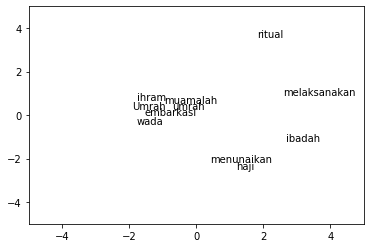

In [36]:
wordVectorsPlot(test1, "umrah", 5)

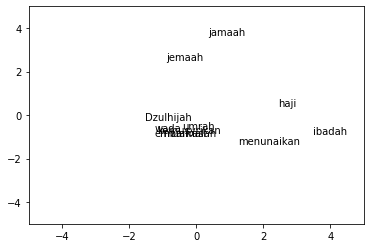

In [45]:
wordVectorsPlot(haji, "haji", 5)

Test Lanjutan

https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4

https://radimrehurek.com/gensim/models/keyedvectors.html

In [49]:
vocab_len = len(model1) 
vocab_len

104336

In [52]:
haji_idx = model1.key_to_index["haji"]
haji_idx

4139

In [54]:
haji_cnt = model1.get_vecattr("haji", "count")
haji_cnt

100197

In [57]:
haji_cos = model1.most_similar_cosmul("haji")
haji_cos

[('wada', 0.8263809680938721),
 ('ibadah', 0.8205979466438293),
 ('menunaikan', 0.8109956383705139),
 ('embarkasi', 0.8055841326713562),
 ('umrah', 0.7758373618125916),
 ('jemaah', 0.7602464556694031),
 ('jamaah', 0.7507472038269043),
 ('kemusyrikan', 0.7297725677490234),
 ('muamalah', 0.7176981568336487),
 ('Dzulhijah', 0.7146812081336975)]

In [58]:
sim = model1.similarity("haji", "umrah")
sim

0.55167615

In [60]:
sim_word = model1.similar_by_word("haji")
sim_word

[('wada', 0.6527634859085083),
 ('ibadah', 0.6411975026130676),
 ('menunaikan', 0.621992826461792),
 ('embarkasi', 0.6111697554588318),
 ('umrah', 0.5516761541366577),
 ('jemaah', 0.5204943418502808),
 ('jamaah', 0.501495897769928),
 ('kemusyrikan', 0.45954659581184387),
 ('muamalah', 0.4353976845741272),
 ('Dzulhijah', 0.4293636679649353)]

In [61]:
sim_vector = model1.similar_by_vector("haji")
sim_vector

[('wada', 0.6527634859085083),
 ('ibadah', 0.6411975026130676),
 ('menunaikan', 0.621992826461792),
 ('embarkasi', 0.6111697554588318),
 ('umrah', 0.5516761541366577),
 ('jemaah', 0.5204943418502808),
 ('jamaah', 0.501495897769928),
 ('kemusyrikan', 0.45954659581184387),
 ('muamalah', 0.4353976845741272),
 ('Dzulhijah', 0.4293636679649353)]

In [70]:
 print(model1.doesnt_match("adalah sebuah shalat".split()))

shalat


In [76]:
distance = model1.distance("haji", "umrah")
distance

0.4483238458633423

In [77]:
vector = model1['haji']  # numpy vector of a word
vector.shape

(300,)